## Tensorflow 2.3: Solving Classification and Regression Problems
### Classification with Tensorflow 2.3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from IPython.display import display
print(tf.__version__)

2.3.0


In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


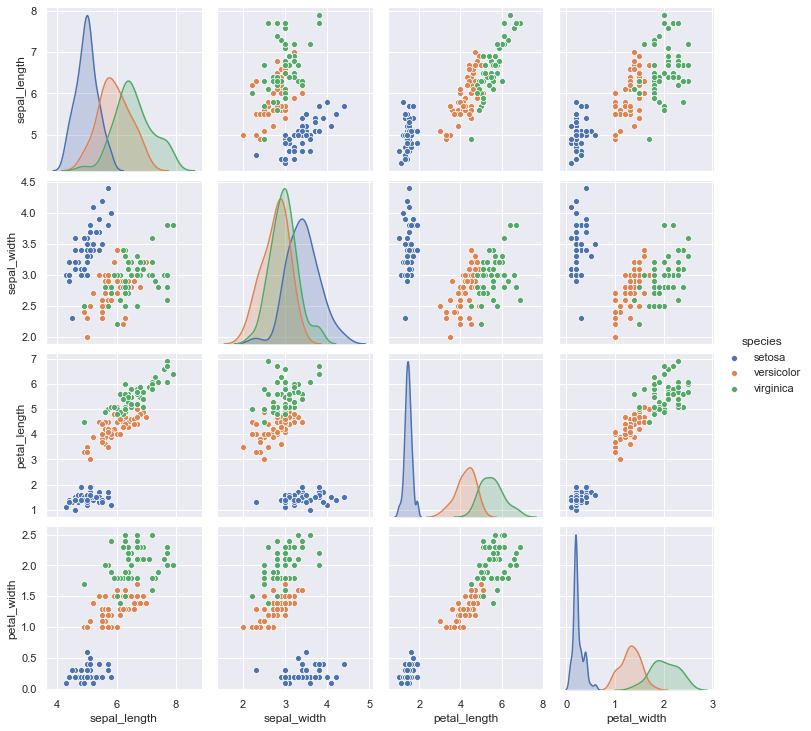

In [3]:
sns.set()
sns.pairplot(iris, hue="species")

In [4]:
species = iris['species'].unique()
species = pd.DataFrame(species)
display(species)

,0
0,setosa
1,versicolor
2,virginica


In [5]:
dict_species = dict(zip(species.index, species.iloc[:, 0]))
print(dict_species)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


In [6]:
data_raw = iris[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
labels = iris[['species']]

In [7]:
data_raw.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
names = data_raw.columns
X_train = norm.fit_transform(data_raw)
X_test = norm.transform(data_raw)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = names
X_test.columns = names
display(X_train)

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


In [9]:
display(labels)

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [10]:
# Convert labels to categorical one-hot encoding
one_hot_labels = pd.get_dummies(labels['species'], prefix = 'species')
one_hot_name = one_hot_labels.columns

In [11]:
display(one_hot_labels)

,species_setosa,species_versicolor,species_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=4))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
total_rows = X_train.shape[0]

In [14]:
batch_size=int(total_rows/10)

In [15]:
model.fit(X_train, one_hot_labels, epochs=100, verbose=0, batch_size=batch_size, use_multiprocessing=True)

In [16]:
# evaluate the model
scores = model.evaluate(X_train, one_hot_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 798us/step - loss: 0.0932 - accuracy: 0.9667
accuracy: 96.67%


In [17]:
# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")
del model  # deletes the existing model

Saved model to disk


In [18]:
# load and evaluate a saved model
from keras.models import load_model
# load model
model = load_model('model.h5')
# summarize model.
model.summary()
print("Loaded model from disk")

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 27        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________
Loaded model from disk


In [19]:
# evaluate the model
scores = model.evaluate(X_test, one_hot_labels)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 800us/step - loss: 0.0932 - accuracy: 0.9667
accuracy: 96.67%


In [20]:
y_proba = model.predict(X_test)

In [21]:
y_predict = pd.DataFrame(y_proba)
y_predict.columns = one_hot_name
y_predict['Prediction'] = np.argmax(y_proba, axis=-1)
y_predict['Prediction'].replace(dict_species, inplace=True)
display(y_predict)

,species_setosa,species_versicolor,species_virginica,Prediction
0,0.998414,0.001586,7.745928e-17,setosa
1,0.996963,0.003037,5.560991e-16,setosa
2,0.998258,0.001742,1.033125e-16,setosa
3,0.996835,0.003165,6.480961e-16,setosa
4,0.998487,0.001513,5.897989e-17,setosa
...,...,...,...,...
145,0.000008,0.041990,9.580017e-01,virginica
146,0.000005,0.030903,9.690920e-01,virginica
147,0.000043,0.128382,8.715748e-01,virginica
148,0.000006,0.031874,9.681198e-01,virginica


In [22]:
tab = pd.crosstab(labels['species'], y_predict['Prediction'], rownames=['Original'], colnames=['Predicted'])
display(tab)

Predicted,setosa,versicolor,virginica
Original,,,
setosa,50,0,0
versicolor,0,47,3
virginica,0,2,48


In [23]:
tabn = tab.to_numpy()
tabm = np.asmatrix(tabn)
diago = np.sum(np.diag(tabm))
suma = np.sum(tabm)
acc =  diago/suma
print('Test accuracy: {:5.2f}%'.format(100*acc))

Test accuracy: 96.67%


### Regression with TensorFlow 2.3

In [24]:
mpg = sns.load_dataset("mpg")
mpg = mpg.dropna()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


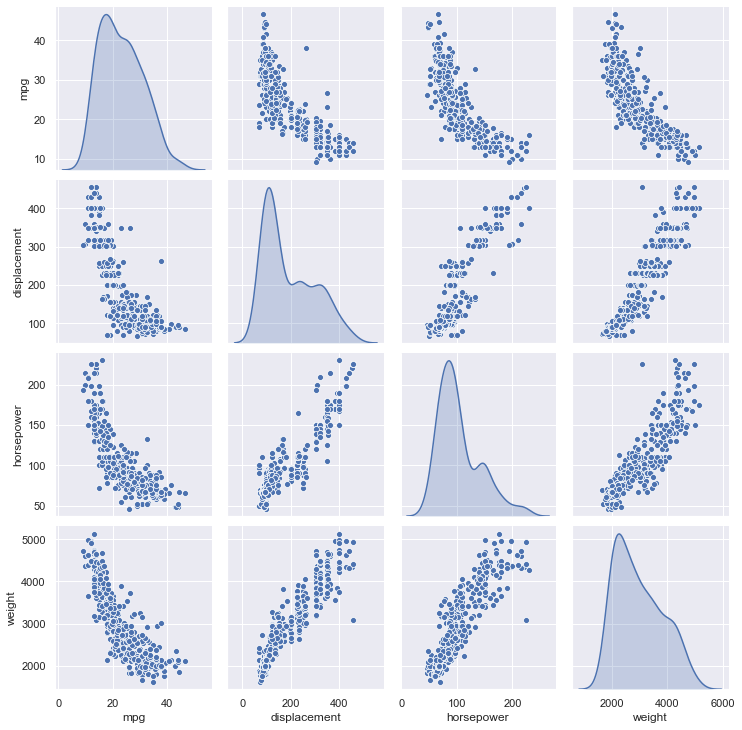

In [25]:
sns.pairplot(mpg[['mpg', 'displacement', 'horsepower', 'weight']], diag_kind='kde')

In [26]:
data_raw = mpg[['displacement', 'horsepower', 'weight']]
y_train = mpg[['mpg']]

In [27]:
data_raw.head()

,displacement,horsepower,weight
0,307.0,130.0,3504
1,350.0,165.0,3693
2,318.0,150.0,3436
3,304.0,150.0,3433
4,302.0,140.0,3449


In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
names = data_raw.columns
X_train = ss.fit_transform(data_raw)
X_test = ss.transform(data_raw)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.columns = names
X_test.columns = names
display(X_train)

,displacement,horsepower,weight
0,1.077290,0.664133,0.620540
1,1.488732,1.574594,0.843334
2,1.182542,1.184397,0.540382
3,1.048584,1.184397,0.536845
4,1.029447,0.924265,0.555706
...,...,...,...
387,-0.520637,-0.480448,-0.221125
388,-0.932079,-1.364896,-0.999134
389,-0.568479,-0.532474,-0.804632
390,-0.712005,-0.662540,-0.415627


In [29]:
display(y_train)

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [30]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=3))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['mean_squared_error'])

In [31]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
total_rows = X_train.shape[0]

In [33]:
batch_size=int(total_rows/10)

In [34]:
model.fit(X_train, y_train, epochs=100, verbose=0, batch_size=batch_size, use_multiprocessing=True)

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt

pred_train = model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train, pred_train)))

3.8655402669637327


In [36]:
pred_train = pd.DataFrame(pred_train)
pred_train.columns = ['mpg_predict']
pred_train.head()

,mpg_predict
0,15.918108
1,14.636847
2,15.134796
3,14.948236
4,15.400579


In [37]:
prediction = pd.concat([y_train, pred_train], axis=1)
prediction['error'] = prediction['mpg_predict'] - prediction['mpg']
prediction.head()

,mpg,mpg_predict,error
0,18.0,15.918108,-2.081892
1,15.0,14.636847,-0.363153
2,18.0,15.134796,-2.865204
3,16.0,14.948236,-1.051764
4,17.0,15.400579,-1.599421


<AxesSubplot:xlabel='mpg', ylabel='mpg_predict'>

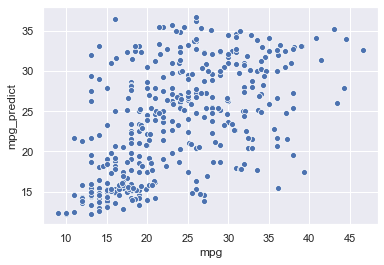

In [38]:
sns.scatterplot(x="mpg", y="mpg_predict", data=prediction)

<AxesSubplot:xlabel='error'>

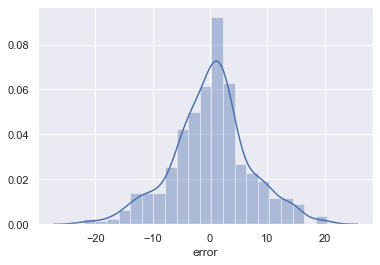

In [39]:
sns.distplot(prediction['error'])

Linear regression model is initialized with weights w: -0.63, b: 0.00
Linear regression model is trained to have weight w: 3.54, b: 0.85


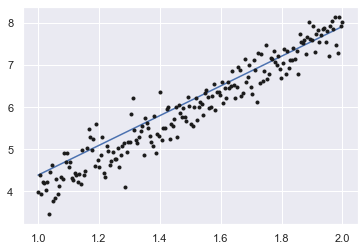

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt 
 
x = data = np.linspace(1,2,200)
y = x*4 + np.random.randn(*x.shape) * 0.3

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))

model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weights w: %.2f, b: %.2f' % (w_init, b_init)) 

model.fit(x,y, batch_size=1, epochs=30, shuffle=False, verbose=0, use_multiprocessing=True)

weights = model.layers[0].get_weights()
w_final = weights[0][0][0]
b_final = weights[1][0]
print('Linear regression model is trained to have weight w: %.2f, b: %.2f' % (w_final, b_final))

predict = model.predict(data)

plt.plot(data, predict, 'b', data , y, 'k.')
plt.show()